In [23]:
%matplotlib inline

# Standard scientific Python imports
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn import svm, metrics

import os
print os.listdir("./FINAL_PICTURES/")[:5] # just print first 5 images to see filename structure
print len(os.listdir("./FINAL_PICTURES/")) 

['000001_1.jpg', '000002_3.jpg', '000003_2.jpg', '000004_4.jpg', '000005_2.jpg']
128


In [24]:
img_dir = "./FINAL_PICTURES/"
images = np.asarray([img_dir+ f for f in os.listdir(img_dir)])
labels = np.asarray([int(l[-5:-4]) for l in images])
images_and_labels = list(zip(images, labels))
print images_and_labels[:2]

[('./FINAL_PICTURES/000001_1.jpg', 1), ('./FINAL_PICTURES/000002_3.jpg', 3)]


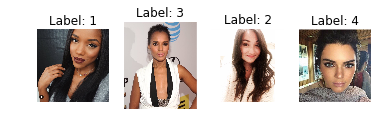

In [25]:
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(Image.open(image), interpolation='none')
    plt.title('Label: %i' % label)

In [42]:
STANDARD_SIZE = (300, 167)
def img_to_matrix(filename, verbose=False):
    """
    takes a filename and turns it into a numpy array of RGB pixels
    """
    img = Image.open(filename)
    if verbose==True:
        print "changing size from %s to %s" % (str(img.size), str(STANDARD_SIZE))
    img = img.resize(STANDARD_SIZE)
    img = list(img.getdata())
    img = map(list, img)
    img = np.array(img)
    return img

def flatten_image(img):
    """
    takes in an (m, n) numpy array and flattens it 
    into an array of shape (1, m * n)
    """
    s = img.shape[0] * img.shape[1]
    img_wide = img.reshape(1, s)
    return img_wide[0]

In [77]:
n_samples = len(images)
flat = []
print flat, type(flat)
for image in images:
    img = img_to_matrix(image)
    img = flatten_image(img)
    flat.append(img)

print type(flat[0])

[] <type 'list'>
<type 'numpy.ndarray'>


In [74]:
data = np.asarray(flat)
print type(data)
print type(data[0])
print data[:2]

<type 'numpy.ndarray'>
<type 'list'>
[ [33, 36, 41, 34, 37, 42, 35, 38, 43, 35, 38, 43, 36, 39, 44, 38, 41, 46, 39, 43, 46, 40, 44, 47, 40, 44, 47, 40, 44, 47, 38, 41, 46, 39, 42, 47, 39, 42, 47, 39, 42, 47, 38, 41, 46, 38, 41, 46, 36, 39, 44, 35, 38, 43, 35, 38, 43, 35, 38, 43, 37, 40, 45, 37, 40, 45, 38, 41, 46, 38, 41, 46, 38, 41, 46, 38, 41, 46, 38, 41, 46, 38, 41, 46, 41, 44, 49, 40, 43, 48, 41, 44, 49, 41, 44, 49, 43, 46, 51, 45, 48, 53, 49, 52, 57, 56, 59, 64, 55, 58, 63, 48, 51, 56, 45, 48, 53, 44, 49, 53, 44, 49, 53, 45, 50, 56, 52, 57, 63, 54, 58, 67, 47, 52, 58, 47, 54, 60, 45, 52, 58, 46, 53, 59, 48, 55, 61, 48, 55, 61, 48, 55, 61, 57, 62, 68, 58, 63, 69, 57, 62, 68, 55, 62, 70, 58, 65, 73, 60, 67, 75, 61, 68, 74, 64, 69, 75, 69, 78, 83, 83, 97, 100, 73, 82, 87, 66, 71, 77, 64, 69, 75, 67, 71, 80, 68, 72, 81, 66, 73, 81, 72, 79, 87, 64, 71, 81, 77, 86, 95, 80, 89, 98, 72, 81, 90, 76, 85, 94, 77, 86, 95, 72, 82, 91, 76, 86, 95, 84, 95, 101, 85, 96, 102, 75, 86, 92, 67, 78, 8

In [78]:
classifier = svm.SVC(gamma=0.001)

In [79]:
classifier.fit(data[:n_samples / 2], labels[:n_samples / 2])

ValueError: setting an array element with a sequence.

In [7]:
pca = RandomizedPCA(n_components=5)
train_x = pca.fit_transform(trainFeatures)
test_x = pca.transform(testFeatures)

ValueError: setting an array element with a sequence.